In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Загрузка данных 
df = pd.read_excel('F:\Оценки.xlsx')
df.head(10)

,id,hotel_id,food,service,yslygi,rating
0,1,Radisson Collection Paradise Resort and Spa,9,8,8,8.333333
1,2,Radisson Blu Resort Congress Centre Сочи,7,8,8,7.666667
2,3,Арфа Паркотель,7,7,7,7.000000
3,4,Отель Omega Sirius,9,8,9,8.666667
4,5,Отель Бархатные Сезоны Екатеринински й квартал,7,6,6,6.333333
5,6,Отель Грейс Кипари,7,8,8,7.666667
6,7,Отель Вилла Дежа Вю,7,8,7,7.333333
7,8,Отель M Otel,6,8,6,6.666667
8,9,Янаис Отель,4,7,7,6.000000
9,10,Отель Адель,10,4,5,6.333333


Введите название отеля:  Новый
Введите качество обслуживания (0-10):  0
Введите качество питания (0-10):  9
Введите расположение (0 - нет, 1 - да):  1
Введите дополнительные услуги (0-10):  6


Рейтинг гостиницы 'Новый': 2.50


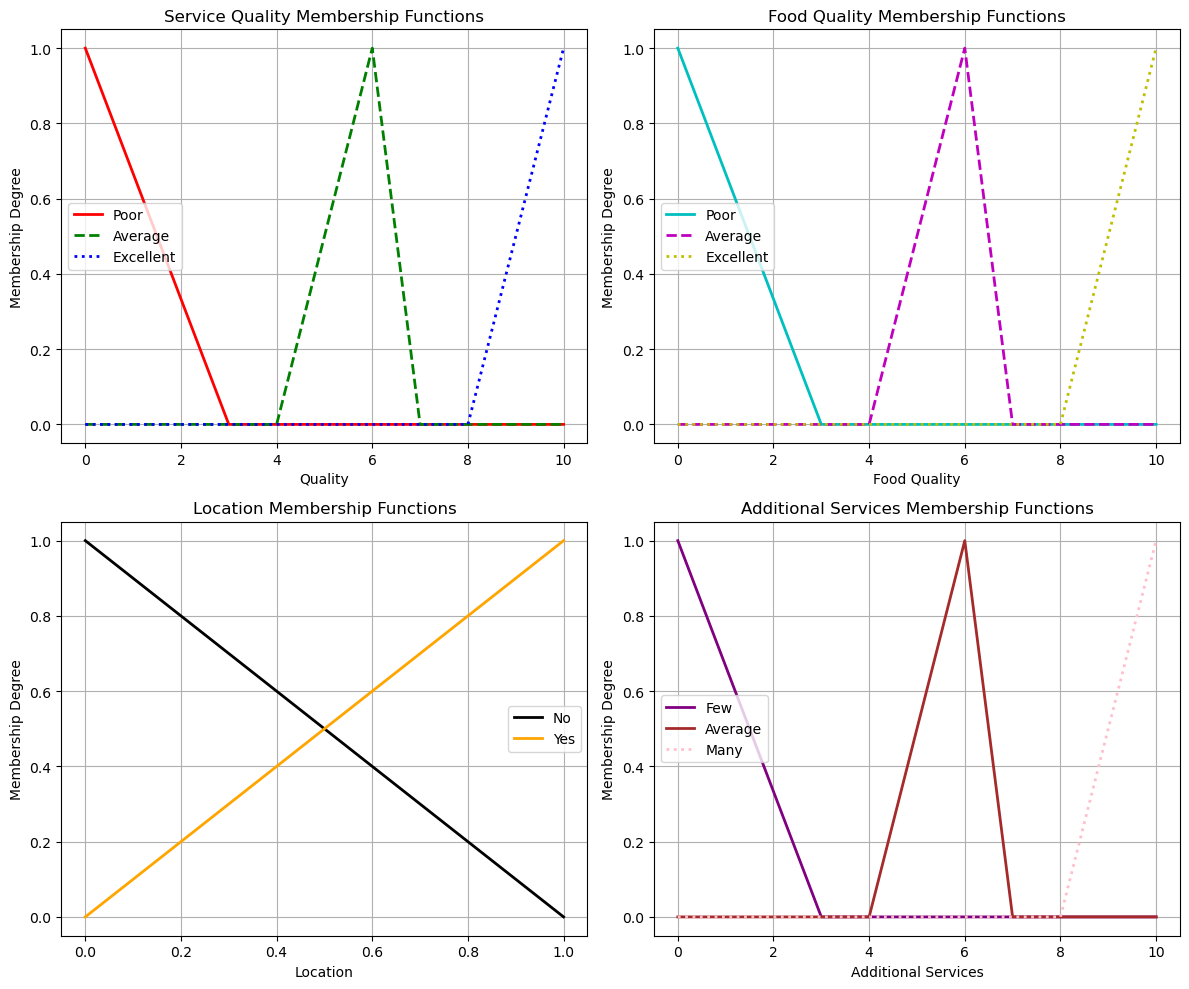

In [32]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Входные диапазоны
quality = np.arange(0, 11, 1)
food_quality = np.arange(0, 11, 1)
location = np.array([0, 1])
additional_services = np.arange(0, 11, 1)
hotel_rating = np.arange(0, 6, 1)

# Определение нечетких множеств
service_quality_poor = fuzz.trimf(quality, [0, 0, 3])
service_quality_average = fuzz.trimf(quality, [4, 6, 7])
service_quality_good = fuzz.trimf(quality, [8, 10, 10])
food_quality_poor = fuzz.trimf(food_quality, [0, 0, 3])
food_quality_average = fuzz.trimf(food_quality, [4, 6, 7])
food_quality_good = fuzz.trimf(food_quality, [8, 10, 10])
location_no = fuzz.trimf(location, [0, 0, 0])
location_yes = fuzz.trimf(location, [0, 1, 1])
additional_services_few = fuzz.trimf(additional_services, [0, 0, 3])
additional_services_average = fuzz.trimf(additional_services, [4, 6, 7])
additional_services_many = fuzz.trimf(additional_services, [8, 10, 10])

# Нечеткие множества для выходной переменной
rating = np.arange(0, 6, 1)
rating_poor = fuzz.trimf(rating, [0, 0, 2])
rating_average = fuzz.trimf(rating, [1, 3, 4])
rating_high = fuzz.trimf(hotel_rating, [3, 5, 5])

# Ввод данных от пользователя
hotel_name = input("Введите название отеля: ")
input_service_quality = float(input("Введите качество обслуживания (0-10): "))
input_food_quality = float(input("Введите качество питания (0-10): "))
input_location = int(input("Введите расположение (0 - нет, 1 - да): "))
input_additional_services = float(input("Введите дополнительные услуги (0-10): "))

# Уровни качества обслуживания
service_quality_level_poor = fuzz.interp_membership(quality, service_quality_poor, input_service_quality)
service_quality_level_average = fuzz.interp_membership(quality, service_quality_average, input_service_quality)
service_quality_level_good = fuzz.interp_membership(quality, service_quality_good, input_service_quality)

# Уровни качества питания
food_quality_level_poor = fuzz.interp_membership(food_quality, food_quality_poor, input_food_quality)
food_quality_level_average = fuzz.interp_membership(food_quality, food_quality_average, input_food_quality)
food_quality_level_good = fuzz.interp_membership(food_quality, food_quality_good, input_food_quality)

# Уровни расположения
location_level_no = fuzz.interp_membership(location, location_no, input_location)
location_level_yes = fuzz.interp_membership(location, location_yes, input_location)

# Уровни дополнительных услуг
additional_services_level_few = fuzz.interp_membership(additional_services, additional_services_few, input_additional_services)
additional_services_level_average = fuzz.interp_membership(additional_services, additional_services_average, input_additional_services)
additional_services_level_many = fuzz.interp_membership(additional_services, additional_services_many, input_additional_services)

# Применение правил
rating_result_poor = np.zeros_like(hotel_rating)
rating_result_average = np.zeros_like(hotel_rating)
rating_result_high = np.zeros_like(hotel_rating)

rule1 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_few))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule1, rating_poor))

rule2 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_average))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule2, rating_poor))

rule3 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_many))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule3, rating_poor))

rule4 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_few))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule4, rating_poor))

rule5 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule5, rating_average))

rule6 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule6, rating_average))

rule7 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_no, additional_services_level_few))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule7, rating_poor))

rule8 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_no, additional_services_level_average))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule8, rating_poor))

rule9 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_no, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule9, rating_average))

rule10 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_few))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule10, rating_poor))

rule11 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule11, rating_average))

rule12 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule12, rating_average))

rule13 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_no, additional_services_level_few))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule13, rating_poor))

rule14 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_no, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule14, rating_average))

rule15 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_no, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule15, rating_average))

rule16 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_few))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule16, rating_average))

rule17 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule17, rating_average))

rule18 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule18, rating_average))

rule19 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_few))
rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule19, rating_poor))

rule20 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule20, rating_average))

rule21 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule21, rating_average))

rule22 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_few))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule22, rating_average))

rule23 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule23, rating_average))

rule24 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule24, rating_average))

rule25 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_no, additional_services_level_few))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule25, rating_average))

rule26 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_no, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule26, rating_average))

rule27 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_no, additional_services_level_many))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule27, rating_average))

rule28 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_few))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule28, rating_average))

rule29 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_average))
rating_result_average = np.fmax(rating_result_average, np.fmin(rule29, rating_average))

rule30 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule30, rating_high))

rule31 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule31, rating_high))

rule32 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_no, additional_services_level_many))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule32, rating_high))

rule33 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_average))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule33, rating_high))

rule34 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_many))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule34, rating_high))

rule35 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_few))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule35, rating_high))

rule36 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_average))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule36, rating_high))

rule37 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
rating_result_high = np.fmax(rating_result_high, np.fmin(rule37, rating_high))

# Объединение всех активированных функций принадлежности
aggregated = np.fmax(np.fmax(rating_result_poor, rating_result_average), rating_result_high)

# Дефаззификация
if np.sum(aggregated) == 0:
    print("Ошибка: ни одно из правил не активировано. Проверьте входные данные и правила.")
else:
    rating = fuzz.defuzz(hotel_rating, aggregated, 'centroid')
    print(f"Рейтинг гостиницы '{hotel_name}': {rating:.2f}")

# Визуализация функций принадлежности
plt.figure(figsize=(12, 10))

# Входные переменные
plt.subplot(2, 2, 1)
plt.plot(quality, service_quality_poor, 'r-', label='Poor', linewidth=2)
plt.plot(quality, service_quality_average, 'g--', label='Average', linewidth=2)
plt.plot(quality, service_quality_good, 'b:', label='Excellent', linewidth=2)
plt.title('Service Quality Membership Functions')
plt.xlabel('Quality')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(food_quality, food_quality_poor, 'c-', label='Poor', linewidth=2)
plt.plot(food_quality, food_quality_average, 'm--', label='Average', linewidth=2)
plt.plot(food_quality, food_quality_good, 'y:', label='Excellent', linewidth=2)
plt.title('Food Quality Membership Functions')
plt.xlabel('Food Quality')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(location, location_no, 'k-', label='No', linewidth=2)
plt.plot(location, location_yes, 'orange', label='Yes', linewidth=2)
plt.title('Location Membership Functions')
plt.xlabel('Location')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(additional_services, additional_services_few, 'purple', label='Few', linewidth=2)
plt.plot(additional_services, additional_services_average, 'brown', label='Average', linewidth=2)
plt.plot(additional_services, additional_services_many, color='pink', linestyle=':', label='Many', linewidth=2)
plt.title('Additional Services Membership Functions')
plt.xlabel('Additional Services')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

C:\Users\User01\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


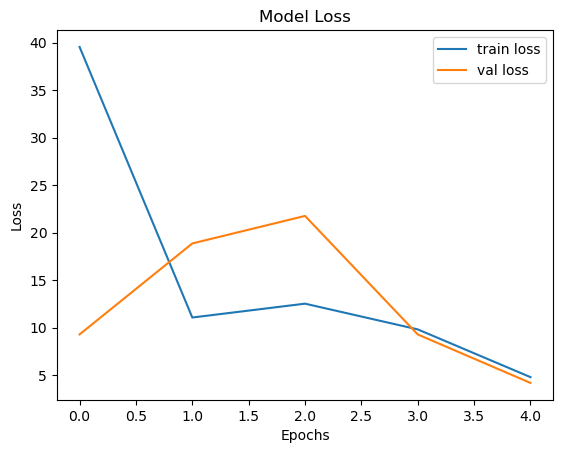

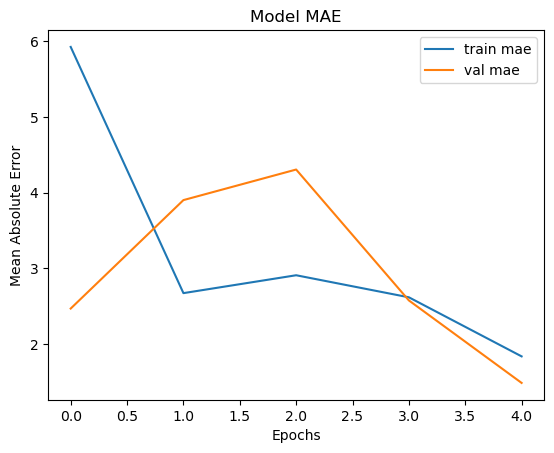

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 4.1652 - mae: 1.4876
Test Loss: 4.165152072906494, Test MAE: 1.4875596761703491


In [4]:
# Загрузка данных 
df = pd.read_excel('F:\Оценки.xlsx')

# Ограничим датасет для ускорения обучения
# Убедимся, что мы не берем больше записей, чем есть в DataFrame
sample_size = min(100, len(df))
df = df.sample(n=sample_size, random_state=42)

# Нормализуем рейтинги, чтобы они были в диапазоне [0, 1]
scaler = MinMaxScaler(feature_range=(0, 10))
df['rating'] = scaler.fit_transform(df[['rating']])

# Разделение данных на обучающую и тестовую выборки
X = df[['id', 'food', 'service', 'yslygi']].values
y = df['rating'].values

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели перцептрона
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),  # Обновлено для соответствия размерности входа
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)  # Для регрессии
])

# Компиляция модели
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Функция для отображения графиков потерь на каждой эпохе
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test), verbose=0)

# График потерь
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# График MAE (средней абсолютной ошибки)
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

# Оценка модели
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

In [5]:
оценки_df = pd.read_excel('F:\Оценки.xlsx')
print(оценки_df.head())

   id                                        hotel_id  food  service  yslygi  \
0   1     Radisson Collection Paradise Resort and Spa     9        8       8   
1   2       Radisson Blu Resort  Congress Centre Сочи     7        8       8   
2   3                                  Арфа Паркотель     7        7       7   
3   4                              Отель Omega Sirius     9        8       9   
4   5  Отель Бархатные Сезоны Екатеринински й квартал     7        6       6   

     rating  
0  8.333333  
1  7.666667  
2  7.000000  
3  8.666667  
4  6.333333  


In [6]:
hotel_cnt = 10

In [7]:
# 1) Подсчет среднего рейтинга для каждого отеля
hotel_ratings = оценки_df.groupby('id')['rating'].mean().reset_index(name='average_rating')

# 2) Объединение информации о среднем рейтинге с оценками отелей
# Предполагается, что в оценках есть столбец 'hotel_id', если его нет, замените на правильное название
hotels_with_ratings = hotel_ratings.merge(оценки_df[['id', 'hotel_id', 'food', 'service', 'yslygi']], on='id', how='left')

# 3) Сортировка отелей по высокому среднему рейтингу
sorted_hotels = hotels_with_ratings.sort_values(by='average_rating', ascending=False)

# 4) Извлечение и отображение отелей с высокой оценкой
high_rating_hotels = sorted_hotels[['id', 'hotel_id', 'average_rating', 'food', 'service', 'yslygi']].head(10).reset_index(drop=True)

# Вывод DataFrame
display(high_rating_hotels)

,id,hotel_id,average_rating,food,service,yslygi
0,35,"Отель ""Светлый путь""",8.666667,9,9,8
1,4,Отель Omega Sirius,8.666667,9,8,9
2,1,Radisson Collection Paradise Resort and Spa,8.333333,9,8,8
3,17,Лесная сказка,8.333333,9,8,8
4,16,Золотой берег,8.333333,10,7,8
5,6,Отель Грейс Кипари,7.666667,7,8,8
6,2,Radisson Blu Resort Congress Centre Сочи,7.666667,7,8,8
7,60,"Отель ""Сердце города""",7.333333,10,2,10
8,7,Отель Вилла Дежа Вю,7.333333,7,8,7
9,48,Уютный уголок природы,7.000000,9,8,4


In [8]:
# Получаем ratings для лучших отелей
top_cnt_ratings = оценки_df[оценки_df['id'].isin(high_rating_hotels['id'])]

# Создаем матрицу оценок с userId в строках и movieId в столбцах
ratings_matrix = top_cnt_ratings.pivot(index='id', columns='hotel_id', values='rating')

ratings_matrix = ratings_matrix.loc[ratings_matrix.index[:hotel_cnt]]

ratings_matrix.to_csv('ratings_matrix.csv')

In [9]:
# Косинусная мера
def cosine_similarity(A, B):
    mask = ~np.isnan(A) & ~np.isnan(B)  # Маска, где оба значения не NaN
    A_filtered = A[mask]
    B_filtered = B[mask]

    dot_product = A_filtered @ B_filtered
    norm_A = np.linalg.norm(A[~np.isnan(A)])
    norm_B = np.linalg.norm(B[~np.isnan(B)])
    if (norm_A * norm_B == 0):
      return np.nan
    return dot_product / (norm_A * norm_B)

In [10]:
def better_values(n, x):
    X = np.copy(x)
    max_args = np.zeros(n, dtype='int32')
    for i in range(n):
        max_args[i] = np.argmax(X)
        X[np.argmax(X)] = -1
    return max_args

In [11]:
person = np.empty(hotel_cnt)
person[:] = np.nan

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(high_rating_hotels['hotel_id'])


def search_hotels(query, df, tfidf_vectorizer, tfidf_matrix, top_n=5):
    # Преобразуем запрос в TF-IDF вектор
    query_vector = tfidf_vectorizer.transform([query])

    similarity_scores = cosine_similarity(query_vector, tfidf_matrix).flatten()
    
    top_indices = similarity_scores.argsort()[::-1][:top_n]
    
    results = df.iloc[top_indices].copy()
    return results

def main_menu():
    while True:
        print("\nГлавное меню:")
        print("1. Добавить отель")
        print("2. Выйти")

        choice = input("Выберите опцию (1 или 2): ")

        if choice == "1":
            query = input("Введите название отеля (частичное название также подходит): ")
            similar_hotels = search_hotels(query, high_rating_hotels, tfidf_vectorizer, tfidf_matrix)
            print("Найденные отели:")
            print(similar_hotels)

            hotel_index = int(input(f"Введите номер отеля (от 0 до {len(similar_hotels) - 1}): "))
            rating = float(input("Введите ваш рейтинг отеля (от 1 до 10): "))

            # Сохраняем рейтинг в массив person
            person[hotel_index] = rating
            print(f"Рейтинг отеля сохранен.")

        elif choice == "2":
            print("Выход из программы.")
            break
        else:
            print("Неверный выбор, попробуйте снова.")

if __name__ == "__main__":
    main_menu()


Главное меню:
1. Добавить отель
2. Выйти


Выберите опцию (1 или 2):  2


Выход из программы.


In [14]:
# Преобразование в массив
rait = ratings_matrix.to_numpy()

# Проверка на NaN в массиве rait
if np.any(np.isnan(rait)):
    
    rait = np.nan_to_num(rait)  # Заменяем NaN на 0



# Проверка на NaN в массиве person
if np.any(np.isnan(person)):
    
    person = np.nan_to_num(person)  # Заменяем NaN на 0

# Убедитесь, что размерности совпадают
if rait.shape[1] != person.shape[0]:
    raise ValueError(f"Размерности не совпадают: person имеет {person.shape[0]}, rait имеет {rait.shape[1]}")

# Инициализация массива для измерений
measure = np.zeros(hotel_cnt)

# Вычисление косинусного сходства
for i in range(hotel_cnt):
    # Вычисление косинусного сходства
    measure[i] = cosine_similarity(person.reshape(1, -1), rait[i, :].reshape(1, -1))

# Количество пользователей для оценки и количество рекомендуемых отелей
L = 10  
N = 5   

# Инициализация коэффициентов
coefs = np.zeros((L, hotel_cnt))

# Получение лучших пользователей
better_persons = better_values(L, measure)

# Учет нулей при вычислении коэффициентов
for i in range(L):
    coefs[i, :] = rait[better_persons[i], :] * measure[i]

# Убедитесь, что NaN в коэффициентах заменяются на 0
coefs[np.isnan(coefs)] = 0

# Получение индексов рекомендуемых отелей
rec_idx = better_values(N, np.sum(coefs, axis=0))

# Вывод рекомендуемых отелей
print('Рекомендуемые отели: ')
for i in range(N):
    print(high_rating_hotels.iloc[rec_idx[i]]['hotel_id'])


Рекомендуемые отели: 
Отель "Светлый путь"
Отель Omega Sirius
Radisson Collection Paradise Resort and Spa
Лесная сказка
Золотой берег


C:\Users\User01\AppData\Local\Temp\ipykernel_5640\3082160781.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  measure[i] = cosine_similarity(person.reshape(1, -1), rait[i, :].reshape(1, -1))
C:\Users\User01\AppData\Local\Temp\ipykernel_5640\3082160781.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  measure[i] = cosine_similarity(person.reshape(1, -1), rait[i, :].reshape(1, -1))
C:\Users\User01\AppData\Local\Temp\ipykernel_5640\3082160781.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this ope

In [15]:
# Загрузка данных
оценки_df = pd.read_excel('F:\Оценки.xlsx')

# Ввод данных через интерактивные строки
id = int(input("Введите ID отеля: "))
food = float(input("Введите оценку за еду (от 1 до 10): "))
service = float(input("Введите оценку за сервис (от 1 до 10): "))
yslygi = float(input("Введите оценку за услуги (от 1 до 10): "))

# Создание входных данных с 4 признаками
input_data = np.array([[id, food, service, yslygi]])  # Убедитесь, что порядок признаков соответствует обучению

# Предсказание рейтинга
predicted_rating = model.predict(input_data)

# Обратное преобразование
predicted_rating_original_scale = scaler.inverse_transform(predicted_rating.reshape(-1, 1))  # Измените форму, если нужно

# Проверка наличия ID в DataFrame
if id in оценки_df['id'].values:
    # Получение названия отеля по hotel_id
    hotel_name = оценки_df.loc[оценки_df['id'] == id, 'hotel_id'].values[0]

    # Вывод результата
    print(f"Предсказанный рейтинг для отеля '{hotel_name}' ({id}): {predicted_rating_original_scale[0][0]}")
else:
    print(f"Отель с ID {id} не найден.")

Введите ID отеля:  63
Введите оценку за еду (от 1 до 10):  8
Введите оценку за сервис (от 1 до 10):  6
Введите оценку за услуги (от 1 до 10):  5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Предсказанный рейтинг для отеля 'Уютная гавань' (63): 6.721283912658691


In [16]:
import pickle
import os

In [ ]:
# Загружаем данные из Excel файла
оценки_df = pd.read_excel('F:\\Оценки.xlsx')

# Массив для хранения оценок пользователя
person = [0] * len(оценки_df)

def main_menu():
    while True:
        print("\nГлавное меню:")
        print("1. Мои отели")
        print("2. Рекомендация отеля")
        print("3. Выход")

        choice = input("Выберите пункт: ")

        if choice == "1":
            my_hotels_menu()
        elif choice == "2":
            high_rating_hotels_df = get_high_rating_hotels(оценки_df)
            hotel_recommendation_menu(high_rating_hotels_df)
        elif choice == "3":
            print("Выход из программы.")
            break
        else:
            print("Неверный выбор, попробуйте снова.")

def my_hotels_menu():
    while True:
        print("\nМои отели:")
        print("1. Список добавленных отелей")
        print("2. Добавить отель и рейтинг")
        print("3. Добавить отель и оценки")
        print("4. Назад")

        choice = input("Выберите пункт: ")

        if choice == "1":
            print("Список добавленных отелей:")
            if hotels:
                for hotel_name, details in hotels.items():
                    print(f"{hotel_name}: Рейтинг - {details['рейтинг']:.2f}, "
                          f"Обслуживание - {details['обслуживание']}, Питание - {details['питание']}, "
                          f"Расположение - {details['расположение']}, Доп. услуги - {details['доп. услуги']}")
            else:
                print("Вы еще не оценили ни один отель.")
        elif choice == "2":
            query = input("Введите название отеля (частичное название также подходит): ")
            similar_hotels = search_hotels(query)
            print("Найденные отели:")
            print(similar_hotels)

            hotel_index = int(input(f"Введите номер отеля (-1) (от 0 до {len(similar_hotels) - 1}): "))
            selected_hotel = similar_hotels.loc[hotel_index, 'hotel_id']
            rating = float(input("Введите ваш рейтинг отеля (от 1 до 10): "))

            # Сохраняем информацию об отеле
            hotels[selected_hotel] = {
                "рейтинг": rating,
                "обслуживание": "нет оценки",
                "питание": "нет оценки",
                "расположение": "нет оценки",
                "доп. услуги": "нет оценки"
            }
            print(f"Рейтинг отеля сохранен.")
        elif choice == "3":
            calculate_hotel_rating()
        elif choice == "4":
            break
        else:
            print("Неверный ввод. Попробуйте снова.")

def search_hotels(query):
    filtered_hotels = оценки_df[оценки_df['hotel_id'].str.contains(query, case=False)]
    return filtered_hotels.reset_index(drop=True)
    
# Словарь для хранения информации об отелях
hotels = {}

def calculate_hotel_rating():
    # Входные диапазоны
    quality = np.arange(0, 11, 1)
    food_quality = np.arange(0, 11, 1)
    location = np.array([0, 1])
    additional_services = np.arange(0, 11, 1)
    hotel_rating = np.arange(0, 6, 1)

    # Определение нечетких множеств
    service_quality_poor = fuzz.trimf(quality, [0, 0, 3])
    service_quality_average = fuzz.trimf(quality, [4, 6, 7])
    service_quality_good = fuzz.trimf(quality, [8, 10, 10])
    
    food_quality_poor = fuzz.trimf(food_quality, [0, 0, 3])
    food_quality_average = fuzz.trimf(food_quality, [4, 6, 7])
    food_quality_good = fuzz.trimf(food_quality, [8, 10, 10])
    
    location_no = fuzz.trimf(location, [0, 0, 0])
    location_yes = fuzz.trimf(location, [0, 1, 1])
    
    additional_services_few = fuzz.trimf(additional_services, [0, 0, 3])
    additional_services_average = fuzz.trimf(additional_services, [4, 6, 7])
    additional_services_many = fuzz.trimf(additional_services, [8, 10, 10])
    
    rating_poor = fuzz.trimf(hotel_rating, [0, 0, 2])
    rating_average = fuzz.trimf(hotel_rating, [1, 3, 4])
    rating_high = fuzz.trimf(hotel_rating, [4, 5, 5])

    # Ввод данных от пользователя
    hotel_name = input("Введите название отеля: ")
    input_service_quality = float(input("Введите качество обслуживания (0-10): "))
    input_food_quality = float(input("Введите качество питания (0-10): "))
    input_location = int(input("Введите расположение (0 - нет, 1 - да): "))
    input_additional_services = float(input("Введите дополнительные услуги (0-10): "))

    # Уровни качества обслуживания
    service_quality_level_poor = fuzz.interp_membership(quality, service_quality_poor, input_service_quality)
    service_quality_level_average = fuzz.interp_membership(quality, service_quality_average, input_service_quality)
    service_quality_level_good = fuzz.interp_membership(quality, service_quality_good, input_service_quality)

    # Уровни качества питания
    food_quality_level_poor = fuzz.interp_membership(food_quality, food_quality_poor, input_food_quality)
    food_quality_level_average = fuzz.interp_membership(food_quality, food_quality_average, input_food_quality)
    food_quality_level_good = fuzz.interp_membership(food_quality, food_quality_good, input_food_quality)

    # Уровни расположения
    location_level_no = fuzz.interp_membership(location, location_no, input_location)
    location_level_yes = fuzz.interp_membership(location, location_yes, input_location)

    # Уровни дополнительных услуг
    additional_services_level_few = fuzz.interp_membership(additional_services, additional_services_few, input_additional_services)
    additional_services_level_average = fuzz.interp_membership(additional_services, additional_services_average, input_additional_services)
    additional_services_level_many = fuzz.interp_membership(additional_services, additional_services_many, input_additional_services)

    # Применение правил
    rating_result_poor = np.zeros_like(hotel_rating)
    rating_result_average = np.zeros_like(hotel_rating)
    rating_result_high = np.zeros_like(hotel_rating)

    rule1 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_few))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule1, rating_poor))
    
    rule2 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_average))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule2, rating_poor))
    
    rule3 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_many))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule3, rating_poor))
    
    rule4 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_few))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule4, rating_poor))
    
    rule5 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule5, rating_average))
    
    rule6 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule6, rating_average))
    
    rule7 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_no, additional_services_level_few))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule7, rating_poor))
    
    rule8 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_no, additional_services_level_average))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule8, rating_poor))
    
    rule9 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_no, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule9, rating_average))
    
    rule10 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_few))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule10, rating_poor))
    
    rule11 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule11, rating_average))
    
    rule12 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule12, rating_average))
    
    rule13 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_no, additional_services_level_few))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule13, rating_poor))
    
    rule14 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_no, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule14, rating_average))
    
    rule15 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_no, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule15, rating_average))
    
    rule16 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_few))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule16, rating_average))
    
    rule17 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule17, rating_average))
    
    rule18 = np.fmin(np.fmin(service_quality_level_poor, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule18, rating_average))
    
    rule19 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_few))
    rating_result_poor = np.fmax(rating_result_poor, np.fmin(rule19, rating_poor))
    
    rule20 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule20, rating_average))
    
    rule21 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_no, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule21, rating_average))
    
    rule22 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_few))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule22, rating_average))
    
    rule23 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule23, rating_average))
    
    rule24 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_poor), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule24, rating_average))
    
    rule25 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_no, additional_services_level_few))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule25, rating_average))
    
    rule26 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_no, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule26, rating_average))
    
    rule27 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_no, additional_services_level_many))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule27, rating_average))
    
    rule28 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_few))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule28, rating_average))
    
    rule29 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_average = np.fmax(rating_result_average, np.fmin(rule29, rating_average))
    
    rule30 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule30, rating_high))
    
    rule31 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule31, rating_high))
    
    rule32 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_no, additional_services_level_many))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule32, rating_high))
    
    rule33 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule33, rating_high))
    
    rule34 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule34, rating_high))
    
    rule35 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_few))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule35, rating_high))
    
    rule36 = np.fmin(np.fmin(service_quality_level_good, food_quality_level_good), np.fmin(location_level_yes, additional_services_level_average))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule36, rating_high))
    
    rule37 = np.fmin(np.fmin(service_quality_level_average, food_quality_level_average), np.fmin(location_level_yes, additional_services_level_many))
    rating_result_high = np.fmax(rating_result_high, np.fmin(rule37, rating_high))

    # Объединение всех активированных функций принадлежности
    aggregated = np.fmax(np.fmax(rating_result_poor, rating_result_average), rating_result_high)

    # Дефаззификация
    if np.sum(aggregated) == 0:
        print("Ошибка: ни одно из правил не активировано. Проверьте входные данные и правила.")
    else:
        rating = fuzz.defuzz(hotel_rating, aggregated, 'centroid')
        print(f"Рейтинг гостиницы '{hotel_name}': {rating:.2f}")
        print(f"Оценки: Обслуживание - {input_service_quality}, Питание - {input_food_quality}, "
              f"Расположение - {input_location}, Доп. услуги - {input_additional_services}")

        # Сохраняем информацию об отеле
        hotels[hotel_name] = {
            "рейтинг": rating,
            "обслуживание": input_service_quality,
            "питание": input_food_quality,
            "расположение": input_location,
            "доп. услуги": input_additional_services
        }

def hotel_recommendation_menu(high_rating_hotels_df):
    while True:
        print("\nРекомендация отеля:")
        print("1. Случайный отель")
        print("2. Рекомендация отелей с высокой оценкой")
        print("3. Рекомендация отелей по 3 предпочтениям")
        print("4. Назад")

        choice = input("Выберите пункт: ")

        if choice == "1":
            #  Предполагается, что функция hotel_filter_menu существует и работает корректно
            filtered_hotels = hotel_filter_menu(high_rating_hotels_df)
            if filtered_hotels is not None and not filtered_hotels.empty:
                random_hotel = filtered_hotels.sample(1)
                print("Случайный отель:")
                print(random_hotel[['hotel_id', 'average_rating']])
            else:
                print("Нет отелей, соответствующих вашему запросу.")
        elif choice == "2":
            print("Рекомендованные отели:")
            display(high_rating_hotels_df[['hotel_id', 'average_rating','food', 'service', 'yslygi']])
        elif choice == "3":
            #  Вызываем функцию recommend_hotels() здесь
            recommend_hotels_df = recommend_hotels() # Вызываем функцию, получаем отфильтрованный DataFrame
            if recommend_hotels_df is not None and not recommend_hotels_df.empty:
                print("Отели, рекомендованные по вашим предпочтениям:")
                display(recommend_hotels_df)
            else:
                print("Нет отелей, соответствующих вашим предпочтениям.")

        elif choice == "4":
            break
        else:
            print("Неверный ввод. Попробуйте снова.")

def get_high_rating_hotels(оценки_df):
    # Подсчет среднего рейтинга для каждого отеля
    hotel_ratings = оценки_df.groupby('id')['rating'].mean().reset_index(name='average_rating')
    # Объединение информации о среднем рейтинге с оценками отелей
    hotels_with_ratings = hotel_ratings.merge(оценки_df[['id', 'hotel_id', 'food', 'service', 'yslygi']], on='id', how='left')

    # Сортировка отелей по высокому среднему рейтингу
    sorted_hotels = hotels_with_ratings.sort_values(by='average_rating', ascending=False)

    # Извлечение и отображение отелей с высокой оценкой
    high_rating_hotels = sorted_hotels[['id', 'hotel_id', 'average_rating', 'food', 'service', 'yslygi']].head(10).reset_index(drop=True)

    return high_rating_hotels

def filter_hotels_by_rating(df, category, rating):
    # Преобразуем столбец в числовой формат, если это необходимо
    df[category] = pd.to_numeric(df[category], errors='coerce')

    # Убираем NaN значения
    df = df.dropna(subset=[category])

    # Фильтруем по точному рейтингу
    filtered_hotels = df[df[category] == rating]

    # Для отладки: выводим количество отелей, соответствующих запросу
    print(f"Найдено отелей с рейтингом {rating} в категории '{category}': {len(filtered_hotels)}")

    return filtered_hotels

def hotel_filter_menu(high_rating_hotels_df):
    while True:
        print("\nМеню фильтрации отелей:")
        print("Выберите категорию для фильтрации:")
        print("1. Food")
        print("2. Service")
        print("3. Yslugi")
        print("4. Назад")

        choice = input("Выберите пункт: ")

        if choice in ['1', '2', '3']:
            category_map = {
                '1': 'food',
                '2': 'service',
                '3': 'yslygi'
            }
            category = category_map[choice]

            try:
                rating = float(input(f"Введите рейтинг для категории '{category}' (от 0 до 10): "))
                if 0 <= rating <= 10:
                    filtered_hotels = filter_hotels_by_rating(high_rating_hotels_df, category, rating)
                    if not filtered_hotels.empty:
                        print("Отели, соответствующие вашему запросу:")
                        print(filtered_hotels[['hotel_id', category]])
                    else:
                        print("Нет отелей, соответствующих вашему запросу.")
                else:
                    print("Пожалуйста, введите число от 0 до 10.")

            except ValueError:
                print("Некорректный ввод. Пожалуйста, введите число.")

        elif choice == "4":
            break
        else:
            print("Неверный выбор, попробуйте снова.")

def recommend_hotels(excel_file="оценки.xlsx"):
    try:
        df = pd.read_excel(excel_file)
        # Проверка наличия необходимых столбцов
        if not all(col in df.columns for col in ["id", "hotel_id", "food", "service", "yslygi"]):
            raise ValueError("В файле Excel должны быть столбцы: id, hotel_id, food, service, yslygi")

    except FileNotFoundError:
        print(f"Ошибка: Файл {excel_file} не найден.")
        return None  # Возвращаем None в случае ошибки
    except ValueError as e:
        print(f"Ошибка: {e}")
        return None # Возвращаем None в случае ошибки
    except Exception as e:
        print(f"Общая ошибка при чтении файла Excel: {e}")
        return None # Возвращаем None в случае ошибки

    print("Оцените ваши предпочтения от 1 до 5 (где 1 - совсем не важно, 5 - очень важно):\n")

    while True:
        try:
            importance_service = int(input("1) Важно ли для вас качество обслуживания? (1-5): "))
            if 1 <= importance_service <= 5:
                break
            else:
                print("Пожалуйста, введите число от 1 до 5.")
        except ValueError:
            print("Пожалуйста, введите целое число.")

    while True:
        try:
            importance_food = int(input("2) Важно ли для вас качество питания? (1-5): "))
            if 1 <= importance_food <= 5:
                break
            else:
                print("Пожалуйста, введите число от 1 до 5.")
        except ValueError:
            print("Пожалуйста, введите целое число.")

    while True:
        try:
            importance_yslygi = int(input("3) Важно ли для вас выбор дополнительных услуг? (1-5): "))
            if 1 <= importance_yslygi <= 5:
                break
            else:
                print("Пожалуйста, введите число от 1 до 5.")
        except ValueError:
            print("Пожалуйста, введите целое число.")

    def get_rating_range(importance):
        if importance <= 2:
            return (0, 4)  # Низкие оценки (до 4 включительно)
        elif importance <= 4:
            return (4, 7)  # Средние оценки (от 4 до 7 включительно)
        else:
            return (7, 10) # Высокие оценки (от 7 до 10 включительно)

    service_range = get_rating_range(importance_service)
    food_range = get_rating_range(importance_food)
    yslygi_range = get_rating_range(importance_yslygi)

    filtered_df = df[
        (df['service'] >= service_range[0]) & (df['service'] <= service_range[1]) &
        (df['food'] >= food_range[0]) & (df['food'] <= food_range[1]) &
        (df['yslygi'] >= yslygi_range[0]) & (df['yslygi'] <= yslygi_range[1])
    ]

    def calculate_utility(row, importance_service, importance_food, importance_yslygi):
        total_importance = importance_service + importance_food + importance_yslygi
        w_service = importance_service / total_importance
        w_food = importance_food / total_importance
        w_yslygi = importance_yslygi / total_importance

        return w_service * row['service'] + w_food * row['food'] + w_yslygi * row['yslygi']

    if not filtered_df.empty:
        filtered_df['utility'] = filtered_df.apply(
            lambda row: calculate_utility(row, importance_service, importance_food, importance_yslygi), axis=1
        )

        filtered_df = filtered_df.sort_values(by='utility', ascending=False)

    if not filtered_df.empty:
        print("\nПодходящие отели:")
        display(filtered_df)  

        average_utility = filtered_df['utility'].mean()
        print(f"\nСредняя полезность выбранных отелей: {average_utility:.2f}")
        return filtered_df # Возвращаем отфильтрованный DataFrame
    else:
        print("\nНет отелей, соответствующих вашим критериям.")
        return pd.DataFrame() # Возвращаем пустой DataFrame

if __name__ == "__main__":
    main_menu()




Главное меню:
1. Мои отели
2. Рекомендация отеля
3. Выход


Выберите пункт:  1



Мои отели:
1. Список добавленных отелей
2. Добавить отель и рейтинг
3. Добавить отель и оценки
4. Назад


Выберите пункт:  2
Введите название отеля (частичное название также подходит):  Отель Адель


Найденные отели:
   id     hotel_id  food  service  yslygi    rating
0  10  Отель Адель    10        4       5  6.333333


Введите номер отеля (-1) (от 0 до 0):  0
Введите ваш рейтинг отеля (от 1 до 10):  8


Рейтинг отеля сохранен.

Мои отели:
1. Список добавленных отелей
2. Добавить отель и рейтинг
3. Добавить отель и оценки
4. Назад


Выберите пункт:  3
Введите название отеля:  Отель Витязь
Введите качество обслуживания (0-10):  9
Введите качество питания (0-10):  9
Введите расположение (0 - нет, 1 - да):  0
Введите дополнительные услуги (0-10):  9


Рейтинг гостиницы 'Отель Витязь': 4.67
Оценки: Обслуживание - 9.0, Питание - 9.0, Расположение - 0, Доп. услуги - 9.0

Мои отели:
1. Список добавленных отелей
2. Добавить отель и рейтинг
3. Добавить отель и оценки
4. Назад


Выберите пункт:  1


Список добавленных отелей:
Отель Адель: Рейтинг - 8.00, Обслуживание - нет оценки, Питание - нет оценки, Расположение - нет оценки, Доп. услуги - нет оценки
Отель Витязь: Рейтинг - 4.67, Обслуживание - 9.0, Питание - 9.0, Расположение - 0, Доп. услуги - 9.0

Мои отели:
1. Список добавленных отелей
2. Добавить отель и рейтинг
3. Добавить отель и оценки
4. Назад
